In [ ]:
# creates: fig18.png
import matplotlib.pyplot as plt
from asr.c2db.infraredpolarizability import \
    Result as InfraredPolarizabilityResult
from asr.c2db.polarizability import Result as PolarizabilityResult
from ase.db import connect
from scipy.interpolate import interp1d

db = connect('c2db-2022-11-30-big.db')
row = db.get(formula='BN')

dct = row.data['results-asr.infraredpolarizability.json']
print(dct.keys())
print(dct)

dct2=dct['kwargs']

irpol = InfraredPolarizabilityResult(**dct2)
print(irpol)
freq = irpol.omega_w
iralpha = irpol.alpha_wvv[:, 0, 0]  # xx-component

# dct = row.data['results-asr.polarizability.json']
# elpol = PolarizabilityResult(**dct['kwargs'])
# x = elpol.frequencies
# y = elpol.alphax_w
# # Interpolate to IR frequency grid:
# elalpha = (interp1d(x, y.real)(freq) +
#            interp1d(x, y.imag)(freq) * 1j)

# alpha = iralpha + elalpha

# ax = plt.subplot()
# ax.plot(freq * 1000, alpha.real, label='real')
# ax.plot(freq * 1000, alpha.imag, label='imag')
# ax.set_xlabel('Energy [meV]')
# ax.set_ylabel(r'Polarizability [$\mathrm{\AA}$]')
# ax.set_xlim(0, 500)
# ax.legend()
# plt.tight_layout()
# plt.savefig('fig18.png')

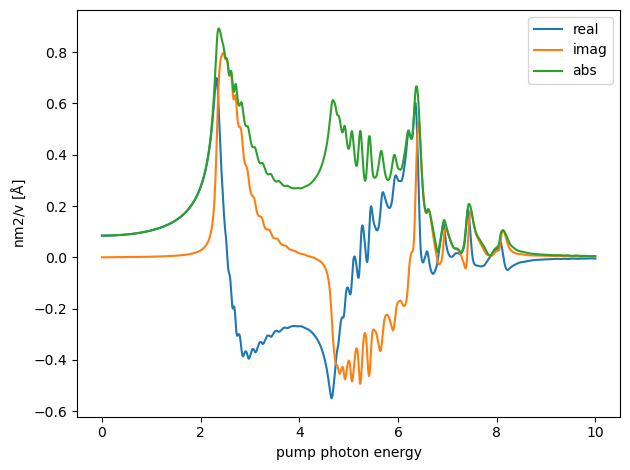

In [2]:
import matplotlib.pyplot as plt
from asr.c2db.shg import Result as SHGResult
from asr.c2db.shg import plot_shg

from ase.db import connect
from scipy.interpolate import interp1d





db = connect('c2db-2022-11-30-big.db')
row = db.get(formula='BN')
dct = row.data['results-asr.shg.json']


#print(row)

#print(dct.keys())

shgpol = SHGResult(dct)

#plot_shg(row)

#shgpol.plot_shg('fig18.png')
freq = shgpol.freqs

nm2_per_v = shgpol.chi['yyy']

#print(nm2_per_v)

#print(shgpol)


ax = plt.subplot()
ax.plot(freq, nm2_per_v.real, label='real')
ax.plot(freq, nm2_per_v.imag, label='imag')
ax.plot(freq, abs(nm2_per_v), label='abs')
ax.set_xlabel('pump photon energy')
ax.set_ylabel(r'nm2/v [$\mathrm{\AA}$]')
#ax.set_xlim(0, 500)
ax.legend()
plt.tight_layout()
plt.savefig('fig18.png')


In [ ]:
def extract_peak_info(x_data, y_data, x_range):
    range_mask = (x_data >= x_range[0]) & (x_data <= x_range[1])
    x_range_data = x_data[range_mask]
    y_range_data = y_data[range_mask]
    
    peak_index = np.argmax(y_range_data)  # Find index of the peak within the range
    peak_position = x_range_data[peak_index]  # Get corresponding x-coordinate
    peak_value = y_range_data[peak_index]  # Get corresponding y-coordinate
    return peak_position, peak_value

for row in db.select(has_asr_shg=True):
    dct = row.data['results-asr.shg.json']
    plt.figure(figsize=(5, 3))
    #print(row)
    #print(dct.keys())
    
    shgpol = SHGResult(dct)
    #shgpol.plot_shg('fig18.png')

    freq = shgpol.freqs
    try:
        nm2_per_v = shgpol.chi['yyy']
    except Exception:
        continue
        
    #print(nm2_per_v)
    #print(shgpol)

    ax = plt.subplot()
    #ax.plot(freq, nm2_per_v.real, label='real')
    #ax.plot(freq, nm2_per_v.imag, label='imag')
    ax.plot(freq, abs(nm2_per_v), label='abs')
    ax.set_xlabel('pump photon energy')
    ax.set_ylabel(r'nm2/v [$\mathrm{\AA}$]')
    ax.set_title(row.formula)

    #ax.set_xlim(0, 500)
    ax.legend()
    plt.tight_layout()
    plt.savefig('fig18.png')
    ranges = [(0.4, 0.9), (0.9, 1.6), (1.6, 2.1)]
    print(row.formula)
    for x_range in ranges:
        peak_position, peak_value = extract_peak_info(freq, abs(nm2_per_v), x_range)
        print(f"Peak Position in range {x_range}: {peak_position}")
        print(f"Peak Value in range {x_range}: {peak_value}")